# Визуальный анализ

*Все задания выполняются только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`, `plotly`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести визуальный анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных композиций.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

> **NB!** *Для выполнения задания возьмите 30 тысяч случайных строк из датасета.*

# Часть 1

## Задание 1

 ***ЗАДАНИЯ ПО R***
  https://colab.research.google.com/drive/1FrP7cr5dcbhMdsuTntpPpYYP5vy_8C0G?usp=sharing

Покажите, какие характеристики музыки коррелируют между собой. Сделайте выводы о корреляциях.

In [ ]:
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")
drive.mount('/content/drive')
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/ВИМ/2ВИМ/music_genre.csv")
import matplotlib.pyplot as plt
import seaborn as sns
data.sample(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
33927,63265.0,The Kills,Hard Habit To Break,35.0,0.0211,0.717,232688.0,0.856,0.278000,A,0.0756,-8.993,Minor,0.0629,137.989,4-Apr,0.767,Blues
39516,51632.0,Flogging Molly,If I Ever Leave This World Alive,58.0,0.2030,0.346,201533.0,0.626,0.000005,D,0.0631,-5.954,Major,0.0304,104.948,4-Apr,0.494,Rock
21929,84977.0,Tucker Beathard,Leave Me Alone,50.0,0.0794,0.520,223035.0,0.635,0.000000,A,0.1290,-3.439,Major,0.0345,?,4-Apr,0.145,Country
23471,65528.0,Chuck Wicks,All I Ever Wanted,37.0,0.0268,0.538,-1.0,0.773,0.000000,B,0.0829,-4.659,Major,0.0281,94.053,4-Apr,0.611,Country
4529,84709.0,empty_field,Pull Up,26.0,0.0234,0.636,207284.0,0.933,0.013100,C,0.2120,-3.349,Major,0.5150,170.27599999999998,4-Apr,0.392,Electronic


Выявили, что в пределах длительности музыки между **1,932,241.80 - 2,898,363.20**мс при максимальном значении всей выборки в **4,830,606мс**. корреляция акустичности и танцевальности равно **-0.78,**
 а чувство танца коррелирует с течением времени в этом пределе на отметке в **0.88**. Это означает, что меньшая и большая длительность является неудовлетворительной для этого чувства, что может дать подсказку будущим REPерам регулировать длительность трека. Чем хуже акустичность, тем лучше чувство танца. Возможно, чтобы не вдаваться в детали/слова песни

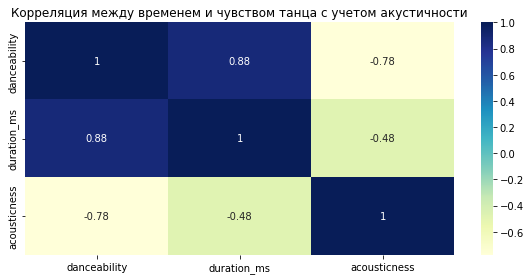

In [ ]:
data_1 = data[(data["duration_ms"] >= 1932241.80) & (data["duration_ms"] <= 2898363.20)] 
cor_matrix = data_1[["danceability", "duration_ms", "acousticness"]].corr()
plt.figure(figsize = (8, 4))
plt.title("Корреляция между временем и чувством танца c учетом акустичности")
sns.heatmap(data = cor_matrix, annot=True, cmap="YlGnBu")

Также обнаружили, что присутствует заметная корреляция между энергией и акустикой **(-0.79)**, громкостью и акустикой **(-0.73)**, а отсюда коррелирование громкости и чувством энергии **(0.84)**. Покажем это

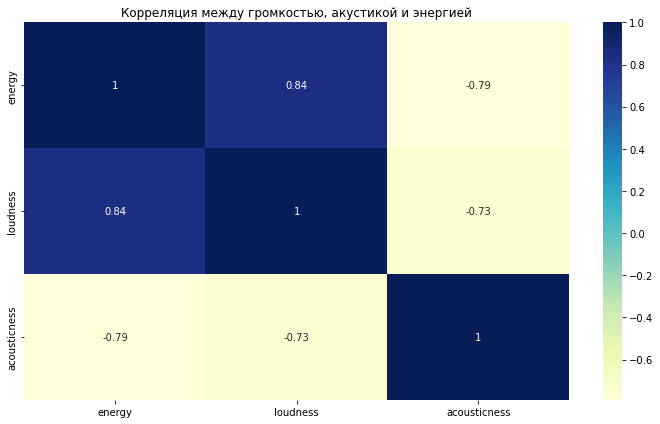

In [ ]:
cor_matrix = data[["energy", "loudness", "acousticness"]].corr()
plt.figure(figsize = (10, 6))
plt.title("Корреляция между громкостью, акустикой и энергией")
sns.heatmap(data = cor_matrix, annot=True, cmap="YlGnBu")
# Логично, что чем громче, тем и уровень энергии выше. Акустика и громкость почти прямопротивоположны, 
# чем выше акустика, тем люди, по моему мнению, будут себя вести спокойнее.

## Задание 2

Покажите на диаграмме разброса три пары признаков, имеющих наибольшую отрицательную корреляцию.

Наибольшая отрицательная корелляция наблюдается у групп: **energy - acousticness = -0.79;
loudness - acousticness = -0.73; instrumentalness - loudness = -0.53.**



Text(0.5, 1.0, 'Диаграмма разброса loudness от instrumentalness')

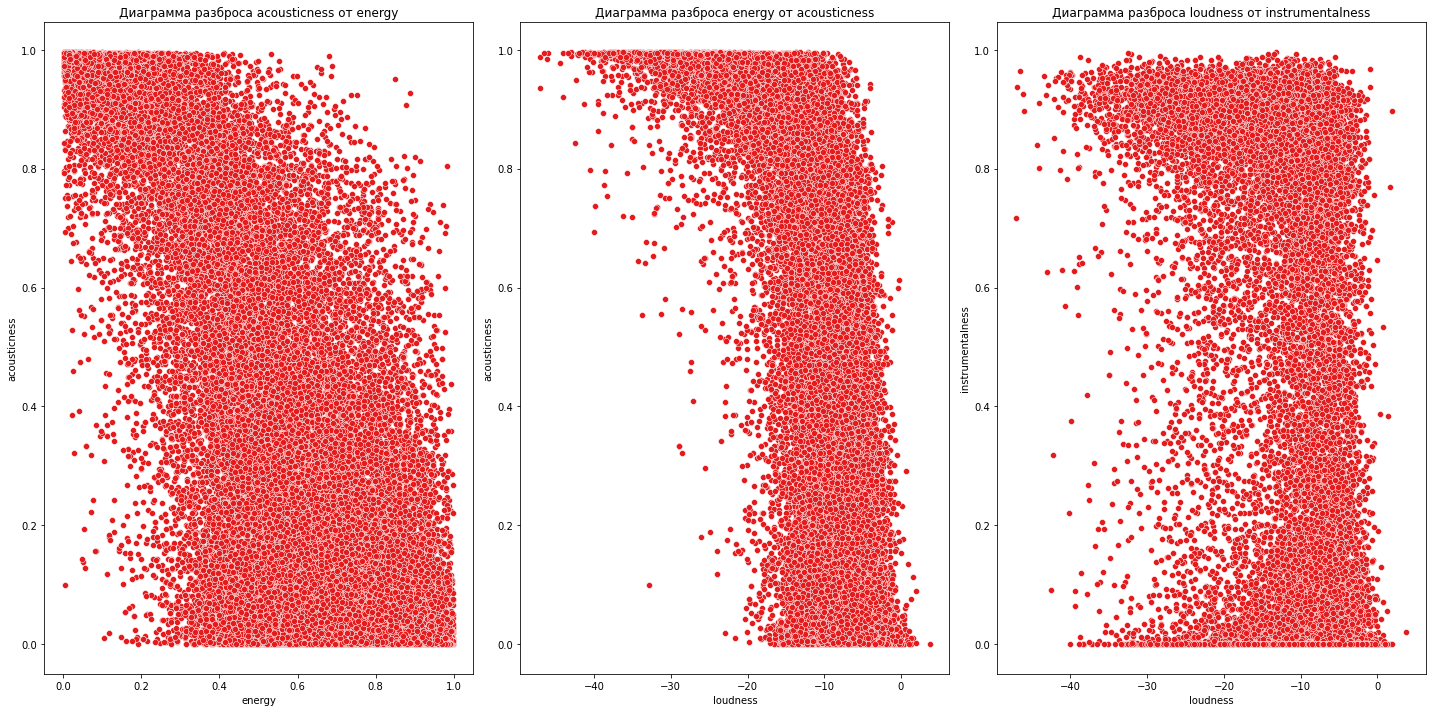

In [ ]:
sns.set_palette("Set1")
fig, axis = plt.subplots(1, 3, figsize=(20, 10))
sns.scatterplot(ax=axis[0], data = data, x = "energy", y = "acousticness").set_title("Диаграмма разброса acousticness от energy")
sns.scatterplot(ax=axis[1], data = data, x = "loudness", y = "acousticness").set_title("Диаграмма разброса energy от acousticness")
sns.scatterplot(ax=axis[2], data = data, x = "loudness", y = "instrumentalness").set_title("Диаграмма разброса loudness от instrumentalness")
# Как можно увидеть, плотность точек смещается от одного края максимума до минимума в сторону другого, что примерно подтверждается значением коэффициента корреляции.

## Задание 3

Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.

Text(0.5, 0, 'Amount of track')

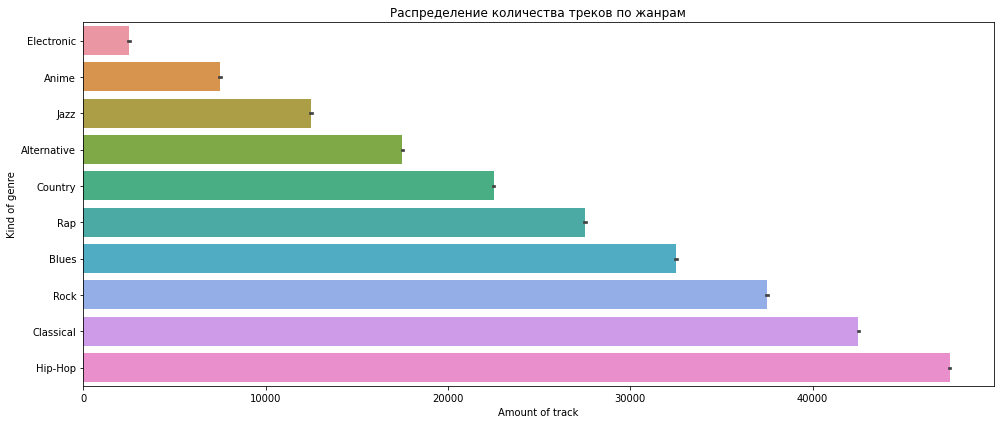

In [ ]:
df = data[["track_name", "music_genre"]]
plt.figure(figsize = (14 , 6))
plt.title("Распределение количества треков по жанрам")

sns.barplot(x = df.index, y = df["music_genre"])
plt.ylabel("Kind of genre")
plt.xlabel("Amount of track")
# Как можно заметить, лидером жанра является Хип-Хоп. Немного удивительно, что разница между жанрами примерно одинаковая, кроме самого первого. Нынче электроника не в моду.

## Задание 4

Для топ-3 жанров покажите на круговой диаграмме с группировкой топ-3 самых популярных исполнителей. Диаграмма должна быть одна.

In [ ]:
# PUT YOUR CODE HERE
import plotly.express as px

hip_hop = data[data["music_genre"] == "Hip-Hop"]
classic = data[data["music_genre"] == "Classical"]
rock = data[data["music_genre"] == "Rock"]

hopers = hip_hop.groupby('artist_name').sum().sort_values(by = 'popularity', ascending = False)
# Первый столбик пустой
save_hopers = hopers.iloc[1:4, [1, 4]]
save_hopers["music_genre"] = "Hip-Hop"

classicers = classic.groupby('artist_name').sum().sort_values(by = 'popularity', ascending = False)
save_classic = classicers.iloc[:3, [1, 4]]
save_classic["music_genre"] = "Classical"

rockers = rock.groupby('artist_name').sum().sort_values(by = 'popularity', ascending = False)
# Первый столбик тоже пустой
save_rock = rockers.iloc[1:4, [1, 4]]
save_rock["music_genre"] = "Rock"

united_df = pd.concat([save_hopers, save_rock, save_classic], axis = 0).reset_index()
united_df.pop("duration_ms")
print(united_df)

fig = px.sunburst(united_df, path=['music_genre', 'artist_name'], values='popularity', labels = 'music_genre')
fig.show()

# Как можно заметить, в топах почти 50% занимает прослушивание классики


               artist_name  popularity music_genre
0                    Drake      6045.0     Hip-Hop
1                   Eminem      5663.0     Hip-Hop
2                   Future      4346.0     Hip-Hop
3              The Beatles      4925.0        Rock
4      Panic! At The Disco      2778.0        Rock
5                    Queen      2673.0        Rock
6  Wolfgang Amadeus Mozart      9275.0   Classical
7    Johann Sebastian Bach      8337.0   Classical
8          Frédéric Chopin      8299.0   Classical


## Задание 5

На вертикальной столбиковой диаграмме для самого популярного и самого непопулярного жанров покажите средние значения по характеристикам. На одной диаграмме покажите 5 характеристик, в которых разница средних значений максимальна. На второй - в которых разница средних значений минимальна.

             m_acoust   m_dance  m_energy    m_inst    m_live  m_speech  \
music_genre                                                               
Electronic   0.121971  0.619220  0.738636  0.348139  0.209782  0.098891   
Hip-Hop      0.179093  0.717373  0.644334  0.010836  0.200870  0.207044   

                m_val  
music_genre            
Electronic   0.389884  
Hip-Hop      0.474927  


<Figure size 1224x864 with 0 Axes>

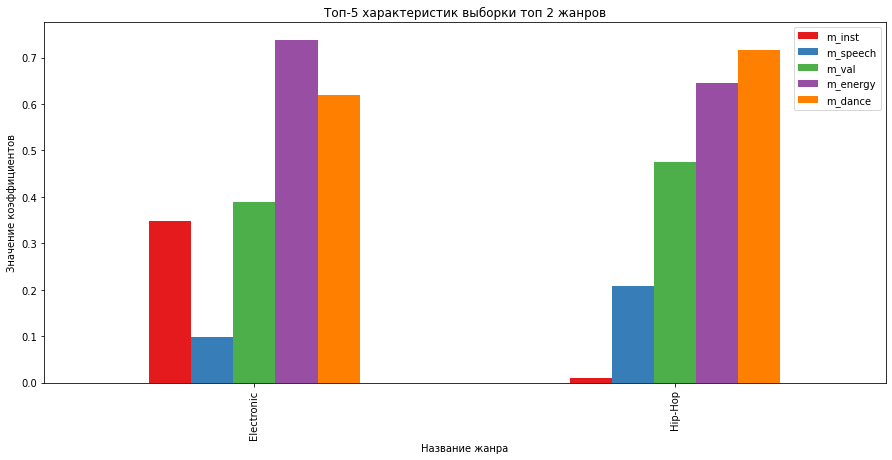

In [ ]:
most = data[data["music_genre"] == "Hip-Hop"]
least = data[data["music_genre"] == "Electronic"]

united_df = pd.concat([most, least], axis = 0).set_index('instance_id')
# Сгруппируем данные по всем числовым характеристикам от 0 до 1
united_df = united_df.groupby('music_genre').agg(m_acoust = ('acousticness', 'mean'), m_dance = ('danceability', 'mean'), m_energy = ('energy', 'mean'), m_inst = ('instrumentalness', 'mean'), m_live = ('liveness', 'mean'), m_speech = ('speechiness', 'mean'), m_val = ('valence', 'mean'))
print(united_df)

new_df = united_df.loc[:, ["m_inst", "m_speech", "m_val", "m_energy", "m_dance"]].reset_index()
plt.figure(figsize = (17, 12))
new_df.plot(x="music_genre", y=["m_inst", "m_speech", "m_val", "m_energy", "m_dance"], kind="bar")
plt.title("Топ-5 характеристик выборки топ 2 жанров")
plt.xlabel("Название жанра")
plt.ylabel("Значение коэффициентов");

Как можно заметить, главными различными критериями выяснились энергичность, объемность, ощущение танца

## Задание 6

Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая", "средняя", "длинная". Значения для каждой категории определите, исследовав данные в столбце `duration_ms`. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.

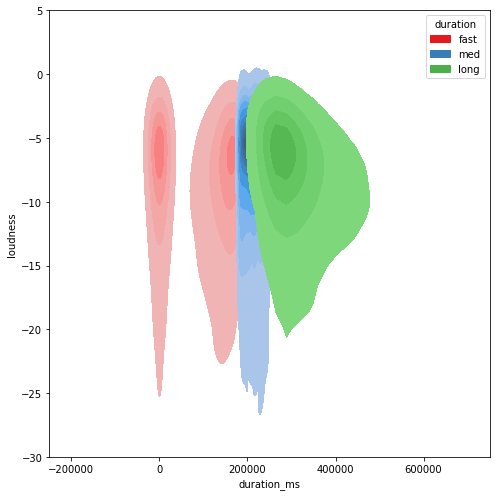

In [ ]:
import numpy as np
data_6 = data.copy()
data_6.groupby('music_genre').agg({"duration_ms": ["mean", "max", "min", "median", "std"]})
conditions = [
             (data_6["duration_ms"] <= 180000.0),
             ((data_6["duration_ms"] > 180000.0) & (data_6["duration_ms"] <= 250000.0)),
             (data_6["duration_ms"] > 250000.0)
            ]
values = ['fast', 'med', 'long']

data_6["duration"] = np.select(conditions, values)
data_6 = data_6.loc[data_6["duration"] != "0"]

plt.figure(figsize = (7,7))
sns.kdeplot(data = data_6, x = "duration_ms", y = 'loudness', hue = 'duration', fill = True)
plt.xlim(-250000, 750000)
plt.ylim(-30, 5)
plt.show()

По сути. Плотность громкости имеет отличительный вид только в случае, когда трек играет "средней" долготы

## Задание 7

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

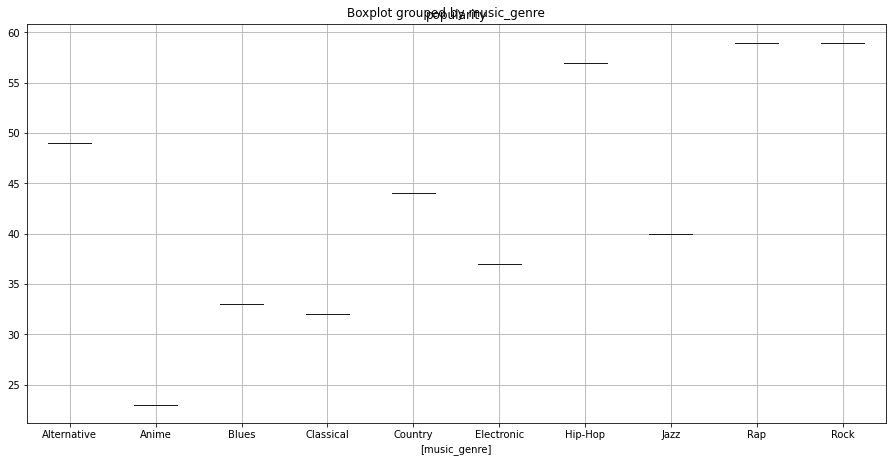

In [ ]:
# PUT YOUR CODE HERE
data_7 = data.copy()
data_7 = data_7.groupby(["music_genre"]).agg({"popularity": "median"}).reset_index()
plt.rcParams["figure.figsize"] = [12.50, 6.50]
plt.rcParams["figure.autolayout"] = True
data_7[["music_genre", "popularity"]].boxplot(by = 'music_genre')
plt.show()

Между собой похожи Rap и Rock, Blues и Electronic

## Задание 8

На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности (для длительности используйте новый категориальный столбец, сформированный в задании 6).

In [ ]:
# PUT YOUR CODE HERE
import plotly.express as px
data_8 = data.copy()

fig = px.pie(data_6, names="duration", values="duration_ms", labels="duration", hole=.5, title = "Численное соотношение треков разной длительности")
fig.show()

Как можно увидеть, половину треков занимает долгая музыка, почти 1/10 занимает быстрая

# Часть 2 (выполнение на R не обязательно)

Для второй части задания будем использовать другой датасет: о распределении Starbucks по всему миру. Датасет возьмем [отсюда](https://www.kaggle.com/starbucks/store-locations).

## Задание 9

Покажите на карте количество кофеен в каждой строне, данные о которой есть в датасете.

In [ ]:
!pip install plotly==4.5
!pip install pycountry
!pip install pycountry-convert
import plotly.express as px
import pycountry
import pycountry_convert as pyconv

In [ ]:
starbucks = pd.read_csv(("/content/drive/MyDrive/ВИМ/2ВИМ/directory.csv"))
stbacks = starbucks.copy()

stbacks = (stbacks.groupby(by='Country', as_index = False).count())[['Country', 'Brand']].rename(columns={'Brand':'Number_of_Starbucks'})
stbacks['Country_full'] =  stbacks['Country'].apply(lambda country: pycountry.countries.get(alpha_2=country).name) # привидение двухбуквенных шифрований названий стран к полным

fig = px.choropleth(stbacks, 
                    locations='Country_full',
                    locationmode = 'country names', # шифровка полных названий стран
                    color='Number_of_Starbucks',
                    color_continuous_scale=px.colors.sequential.Greens,
                    range_color=(0, 1770),
                    labels={'Country_full':'Страна', 'Number_of_Starbucks':'Количество заведений'}
                    )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

В США больше всего старбаксов!

## Задание 10

Покажите на диаграмме вида treemap количество кофеен в каждой стране каждого региона мира, данные о которых есть в датасете. Страну подписывайте названием, а не ее кодом.

In [ ]:
import warnings
warnings.filterwarnings("ignore")
continents = {
    'NA': 'North America',       # Приведем в set двухбуквенные коды и полные названия континентов
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}

stbacks['Continent'] =  stbacks['Country'].apply(lambda country: continents[pyconv.country_alpha2_to_continent_code(country)]) # Континент по двухбуквенному коду страны

fig = px.treemap(stbacks, path=['Continent', 'Country_full'], values='Number_of_Starbucks', color='Number_of_Starbucks', color_continuous_scale=px.colors.sequential.Greens, range_color=(0, 2000))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()
# Странно, но в пайчарме нормально выводит, но здесь нет

TypeError: ignored